# Boston House Prices

### Introduction



In this notebook I am looking at the well known Boston House Prices dataset. I will be
using Python to:

       1. Explore and describe the dataset.
       2. Investigate whether there is a significant difference in median house
          prices between those on the Charles river and those that aren't.
       3. Create a neural network that can predict the median house price based 
          on the other variables in the dataset.
          
      
***
  

## 1 . The Boston House Prices Dataset

### Background

The data contained in the Boston House Price Dataset was published by David Harrision, Jr. and Daniel L. Rubenfield in 1976 as part of their paper:
 _"Hedonic Housing Prices and the Demand for Clean Air"_ [Ref I JOURNAL OF ENVIRONMENTAL ECONOMICS AND MANAGEMENT 5, 81-102 PDF](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf)

In their paper they investigate the problems associated with using housing market data to investigate people's willingness to pay for cleaner air. Their study uses data drawn from the census tracts in the Boston Standard Metrepolitan Statistical Area in 1970. It focuses on a dependent variable, the median value of owner-occupied homes in 506 areas of Boston. There are 13 further independent variables in the dataset. These are made up of two structural attribute variables; eight neighbourhood variables; two accessibility variables;  and one air pollution variable (Ref I).



### Importing and preparing the dataset

I import the Python Libraries for this notebook in the cell below.

In [1]:
# Import of all the python libraries required for this notebook and 
# setting of plotting parameters for the notebook
# Matplotlib had to be upgraded to overcome an issue with heatmaps.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras as kr
import sklearn.model_selection as mod
from matplotlib import rcParams
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 10)
#pd.options.display.max_rows = None



Using TensorFlow backend.


The dataset is readily available in Python. I imported it from the Sklearn package. I converted it to a dataframe to work with. I also added the dependent variable MDEV to the dataset and called it PRICE, in the cell below.

In [2]:
# import and preparation of the Boston house price dataset for analysis
# adapted from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
# and adapted from Ref II (https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef)

from sklearn.datasets import load_boston
bostonds = load_boston()  #bostonds is a dictionaray

# Convert to a pandas dataframe
boston = pd.DataFrame(bostonds.data)
# Add the feature_names from the bostonds dictionary as columns
boston.columns = bostonds.feature_names
# Add the target attribute, the price, from the dictionary to the dataframe
boston['PRICE'] = bostonds.target

The dataset contains 506 rows and 14 columns. In the cell below I am running a quick 
check to ensure there are no null values in the data, and there are none.

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

A look at first few rows in the dataset:

In [5]:
boston.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24

I have compiled a description of each attribute in the dataset in order below:

- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
-  RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per \$10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- PRICE     Median value of owner-occupied homes in \$1000's

The above information taken from the output of running the descr command below:
#print(bostonds.DESCR)

### Exploring the Boston Housing dataset

In the cell below we can see how the median value of homes is distributed. PRICE appears to be normally distributed, but slightly skewed to the high end.

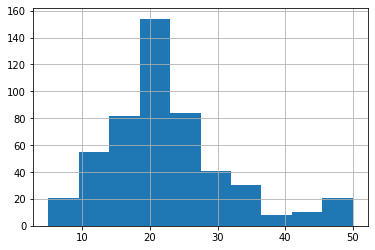

In [6]:
boston['PRICE'].hist()

In the table below we can see summary statisitics for each attribute in the dataset.

In [30]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Next I will look at the realtionship between each of the attributes in the dataset and PRICE. In the heatmap below values with a corrleation coefficient close to 1 have a strong positive correlation; those values close to -1 have a strong negative correlation.

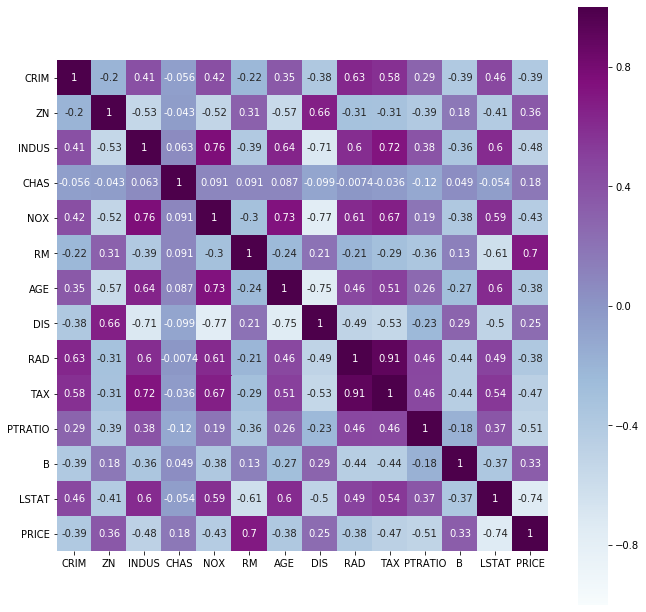

In [32]:
corr = boston.corr()
plt.figure(figsize=(11,11))
ax = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, cmap='BuPu', center=0,square=True, xticklabels=corr.columns.values,yticklabels=corr.columns.values )


In [ ]:
The attributes mostly appear to the have relationships we would expect with PRICE. A higher crime rate, proportion of 
industry, nitric oxide concentration, proportion of older owner-occupied properties all have a negative impact on 
median prices. 

Focusing on the attributes strongly correlated with price we will take a closer look at LSTAT, RM, INDUS and PTRATIO.

Check the relationship between the variables in the dataset and their impact on the prices

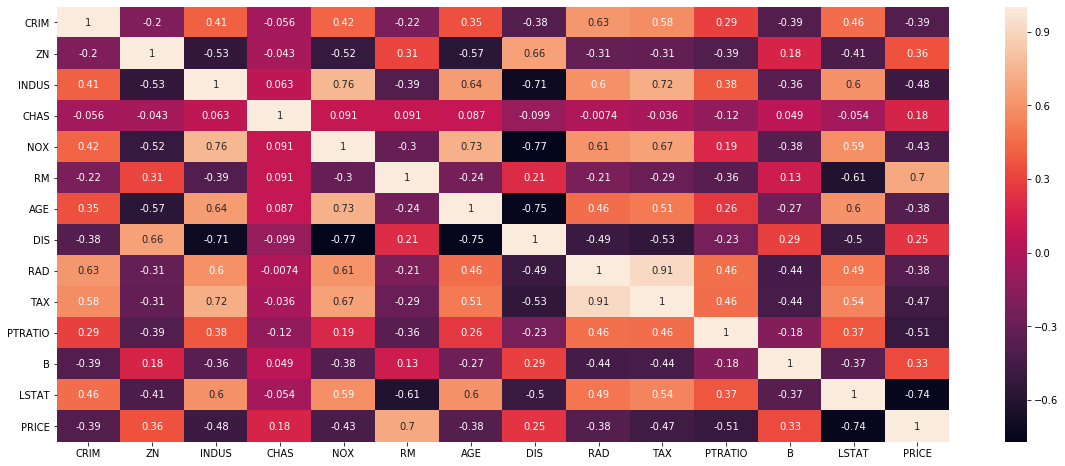

In [10]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
               annot=True)
plt.show()

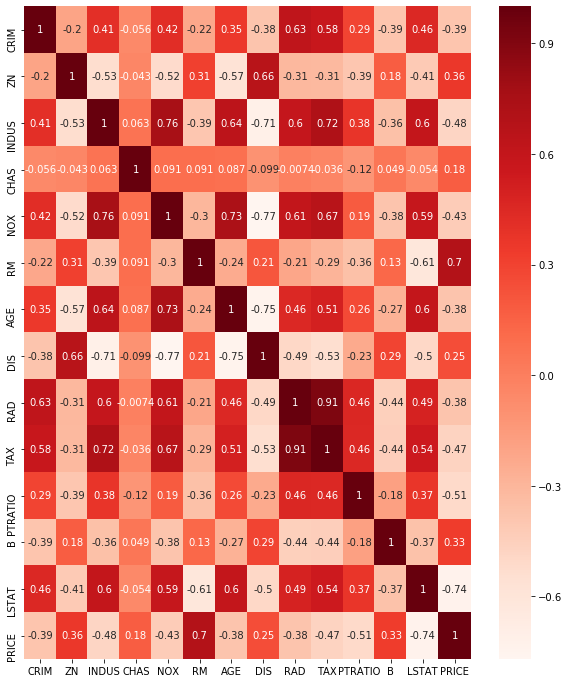

In [11]:
#Using Pearson Correlation
plt.figure(figsize=(10,12))
cor = boston.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Text(0.5, 1, 'Heatmap of Boston Housing Dataset\n\n')

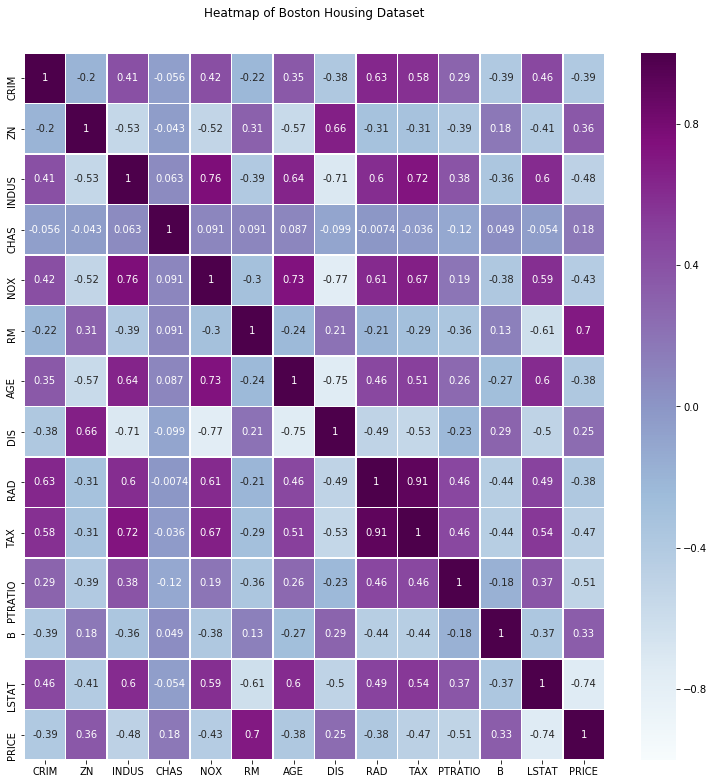

In [12]:

fig = plt.figure(figsize=(13,13))
r = sns.heatmap(corr,annot=True, cmap='BuPu', vmin=-1, vmax=1, center=0, linewidths=.5)
r.set_title("Heatmap of Boston Housing Dataset\n\n")

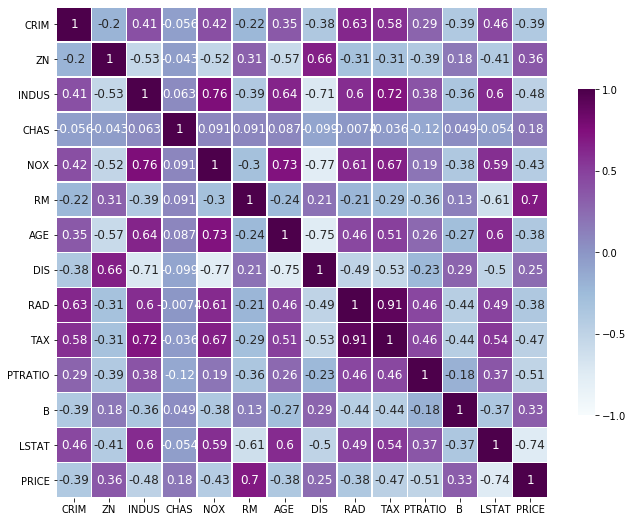

In [13]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr, 
                      square = True,
                      linewidths = .5,cmap ='BuPu', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})#add the column names as labels


In [14]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
boston.loc[:,['CHAS','PRICE']]

,CHAS,PRICE
0,0.0,24.0
1,0.0,21.6
2,0.0,34.7
3,0.0,33.4
4,0.0,36.2
...,...,...
501,0.0,22.4
502,0.0,20.6
503,0.0,23.9
504,0.0,22.0


In [16]:
#https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

In [17]:
#df.corr

In [18]:
boston.iloc[0,:]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
PRICE       24.00000
Name: 0, dtype: float64

In [19]:
m = kr.models.Sequential()
m.add(kr.layers.Dense(units=10, activation='linear', input_dim=13))
m.add(kr.layers.Dense(units=100, activation='sigmoid'))
#m.add(kr.layers.Dense(units=100, activation='linear'))
#m.add(kr.layers.Dense(units=100, activation='sigmoid'))
#m.add(kr.layers.Dense(units=1000, activation='tanh'))
#m.add(kr.layers.Dense(units=1000, activation='tanh'))
#m.add(kr.layers.Dense(units=300, activation='linear'))
#m.add(kr.layers.Dense(units=300, activation='sigmoid'))
m.add(kr.layers.Dense(units=10, activation='linear' ))
m.add(kr.layers.Dense(units=1, activation='linear'))

# Add a three neuron output layer.
#m.add(kr.layers.Dense(units=1, activation='linear'))

# Build the graph.
m.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

### Build Keras Model

In [20]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 100 neurons and an input layer with 13 .
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))

model.add(kr.layers.Dense(units=100, activation='linear', input_dim=5))
model.add(kr.layers.Dense(units=100, activation='linear'))
model.add(kr.layers.Dense(units=100, activation='sigmoid'))
model.add(kr.layers.Dense(units=100, activation='linear' ))
#model.add(kr.layers.Dense(units=1, activation='linear'))

# Add a three neuron output layer.
model.add(kr.layers.Dense(units=1, activation='linear'))

# Build the graph.
model.compile(loss='mean_squared_error', optimizer='Adamax', metrics=['accuracy'])

In [21]:
boston.iloc[0,:]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
PRICE       24.00000
Name: 0, dtype: float64

In [22]:
inputs = boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
#inputs = boston[['CRIM','NOX','ZN','PTRATIO','LSTAT']]

In [23]:
outputs = boston['PRICE']
outputs

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [24]:


# Split the inputs and outputs into training and test sets.
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.8)
#inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.8)



In [25]:
m.fit(inputs_train, outputs_train, epochs=15, batch_size=20)




Epoch 1/15





101/101 [==============================] - 7s 71ms/step - loss: 480.5344 - acc: 0.0000e+00
Epoch 2/15
101/101 [==============================] - 0s 385us/step - loss: 403.9758 - acc: 0.0000e+00
Epoch 3/15
101/101 [==============================] - 0s 424us/step - loss: 348.2538 - acc: 0.0000e+00
Epoch 4/15
101/101 [==============================] - 0s 415us/step - loss: 302.0972 - acc: 0.0000e+00
Epoch 5/15
101/101 [==============================] - 0s 373us/step - loss: 254.0517 - acc: 0.0000e+00
Epoch 6/15
101/101 [==============================] - 0s 512us/step - loss: 206.4890 - acc: 0.0000e+00
Epoch 7/15
101/101 [==============================] - 0s 423us/step - loss: 165.1239 - acc: 0.0000e+00
Epoch 8/15
101/101 [==============================] - 0s 464us/step - loss: 131.2944 - acc: 0.0000e+00
Epoch 9/15
101/101 [==============================] - 0s 373us/step - loss: 105.8939 - acc: 0.0000e+00
Epoch 10/15
101/101 [==============================] - 0s 403us/st

### Train

In [26]:
# Train the neural network.
#model.fit(inputs_train, outputs_train, epochs=15, batch_size=10)
#model.fit(inputs_train, outputs_train, epochs=15, batch_size=10) loss 72
#model.fit(inputs_train, outputs_train, epochs=32, batch_size=10)

#### Plot

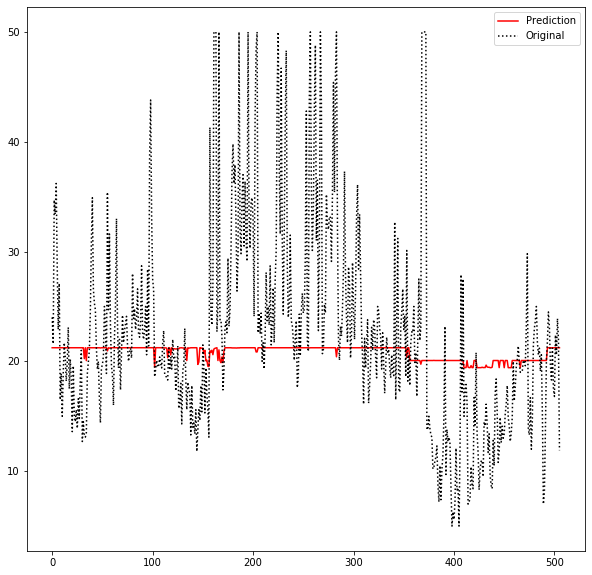

In [27]:

plt.rcParams['figure.figsize'] = (10, 10)
# all values through the model
#p = model.predict(inputs)
p = m.predict(inputs)
# Plot the values.

plt.plot(p, 'r-', label='Prediction')
plt.plot(outputs, 'k:', label='Original')
plt.legend()

In [28]:
References

https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air',

This course
Books
Deep Learning with Python Jason Brownlee
Deep Learning Tutorial Steve Nouri
https://keras.io keras documentation 
    
https://medium.com/@himanshuxd/the-guide-to-rigorous-descriptive-statistics-for-machine-learning-and-data-science-9209f88e4363


SyntaxError: invalid syntax (<ipython-input-28-cdc3b3e46772>, line 3)

## References

I.  Hedonic Housing Prices and the Demand for Clean Air 1976  [JOURNAL OF ENVIRONMENTAL ECONOMICS AND MANAGEMENT 5, 81-102 PDF](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf)

II.  Ai Hadar: Method used to import the dataset [Medium.com](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef)

III. CSO - [Ages of children in first class] (https://www.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=EDA42&PLanguage=0)

IV. Heights [UK WHO growth chart boys](https://www.rcpch.ac.uk/sites/default/files/Boys_2-18_years_growth_chart.pdf)

V. Heights [UK WHO growth chart girls](https://www.rcpch.ac.uk/sites/default/files/Girls_2-18_years_growth_chart.pdf)

VI. Heights [Growth monitoring resources](https://www.hse.ie/eng/health/child/growthmonitoring/)

VII. Heights [Normally distributed](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2831262/#b27-dem-46-0001)

VIII. BMI Wiki [BMI Wiki](https://en.wikipedia.org/wiki/Body_mass_index)

IX. WHO BMI Boys [Boys BMI](https://www.who.int/growthref/sft_bmifa_boys_z_5_19years.pdf?ua=1) 

x. WHO BMI Girls [Girls BMI](https://www.who.int/growthref/sft_bmifa_girls_z_5_19years.pdf?ua=1) 

XI. BMI distribution curve [BMI distribution](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1636707/)